In [7]:
import os
import re
import json
import matplotlib.pyplot as plt
from datetime import datetime

def extract_train_size_from_filename(filename):
    pattern = r'(unet_resnet50)_(\w+)_lr([\d\.]+)_bs(\d+)_(\w+)_(\d+.?\d*)pct_(\d+)'
    match = re.search(pattern, filename)
    if match:
        model = match.group(1)
        opt = match.group(2)
        lr = match.group(3)
        bs = match.group(4)
        loss = match.group(5)
        ts = match.group(6)
        dt = match.group(7)
        return f"{model}_{opt}_lr{lr}_bs{bs}_{loss}_{ts}pct_{dt}"
    return None

def filter_outliers(values, threshold=0.6):
    return [v if v <= threshold else None for v in values]

def load_metrics_from_directory(directory, threshold=0.6):
    results = {}
    for fname in os.listdir(directory):
        if fname.endswith("_metrics.json"):
            full_path = os.path.join(directory, fname)
            train_size = extract_train_size_from_filename(fname)
            if train_size is None:
                continue
            with open(full_path, "r") as f:
                data = json.load(f)
            train_losses = filter_outliers(data["train_losses"], threshold)
            val_losses = filter_outliers(data["val_losses"], threshold)
            val_ious = data["val_ious"]
            results[train_size] = (train_losses, val_losses, val_ious)
    return results

def plot_metric(metrics, title, ylabel, out_png=None):
    plt.figure(figsize=(16, 12))
    for train_size, values in sorted(metrics.items()):
        epochs = range(1, len(values) + 1)
        plt.plot(epochs, values, label=f"{train_size}")
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.grid(True)
    if out_png:
        plt.savefig(out_png, bbox_inches="tight")
    plt.show()



In [8]:
# Paths
medsam_metrics_dir = "/home/fonta42/Desktop/masters-degree/experiments/med-sam/metrics"
unet_metrics_dir   = "/home/fonta42/Desktop/masters-degree/experiments/u-net/metrics"

# Load metrics
medsam_data = load_metrics_from_directory(medsam_metrics_dir)
unet_data   = load_metrics_from_directory(unet_metrics_dir)

# Get the current date for plotting name
current_date = datetime.now()
formatted_date = current_date.strftime("%d_%m_%Y")

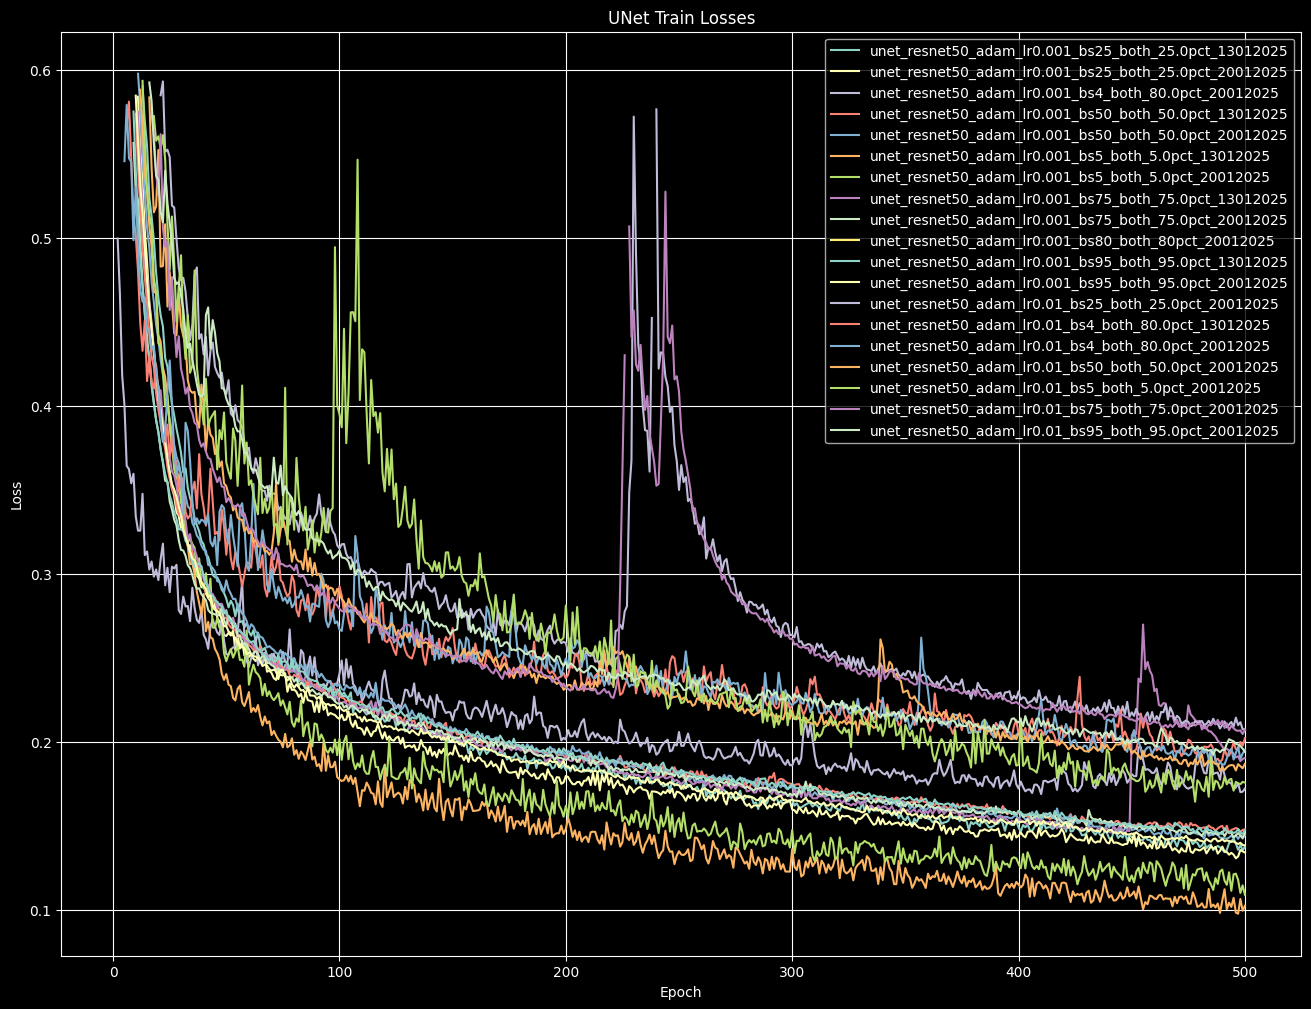

In [9]:
# UNet Train Losses
unet_train_losses = {ts: values[0] for ts, values in unet_data.items()}
plot_metric(unet_train_losses, "UNet Train Losses", "Loss", out_png=f"./metrics_overview/unet_train_losses_{formatted_date}.png")


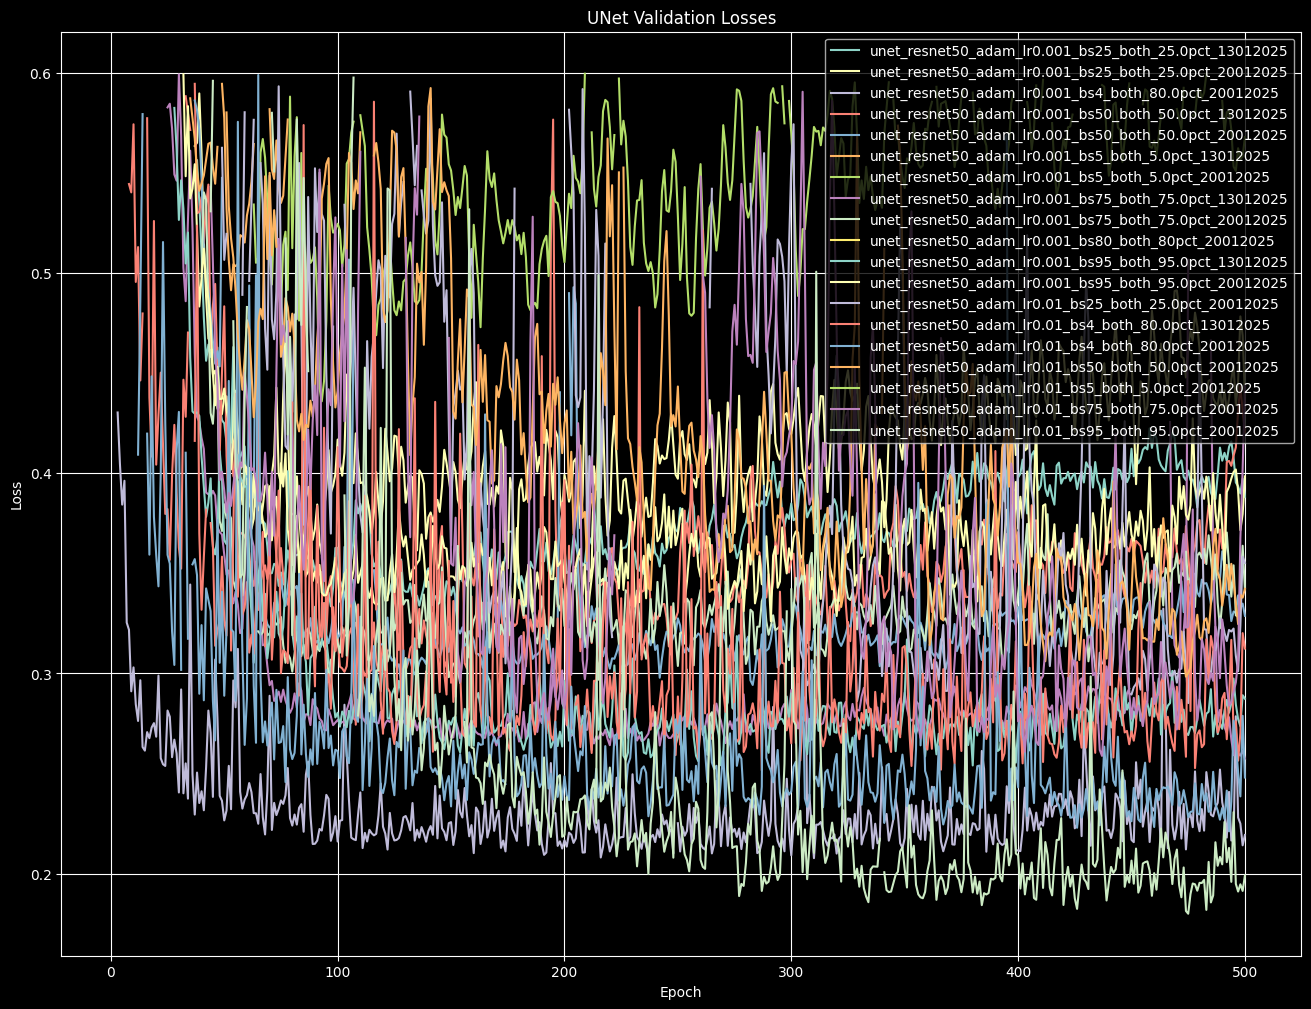

In [10]:
# UNet Validation Losses
unet_val_losses = {ts: values[1] for ts, values in unet_data.items()}
plot_metric(unet_val_losses, "UNet Validation Losses", "Loss", out_png=f"./metrics_overview/unet_val_losses{formatted_date}.png")

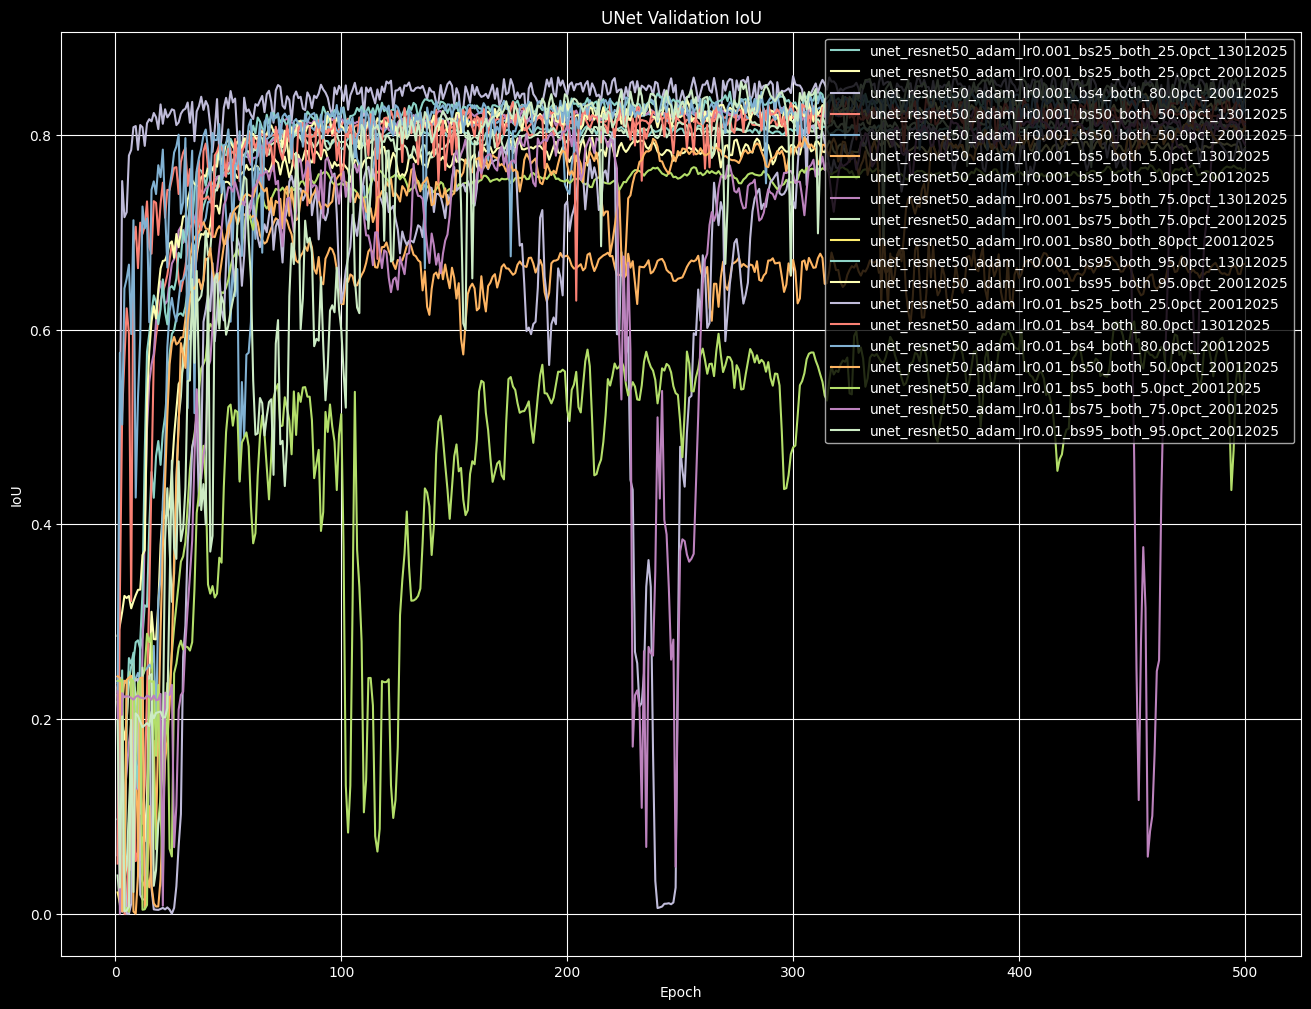

In [11]:
# UNet Validation IoU
unet_val_iou = {ts: values[2] for ts, values in unet_data.items()}
plot_metric(unet_val_iou, "UNet Validation IoU", "IoU", out_png=f"./metrics_overview/unet_val_iou{formatted_date}.png")

/tmp/ipykernel_7667/1749662990.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


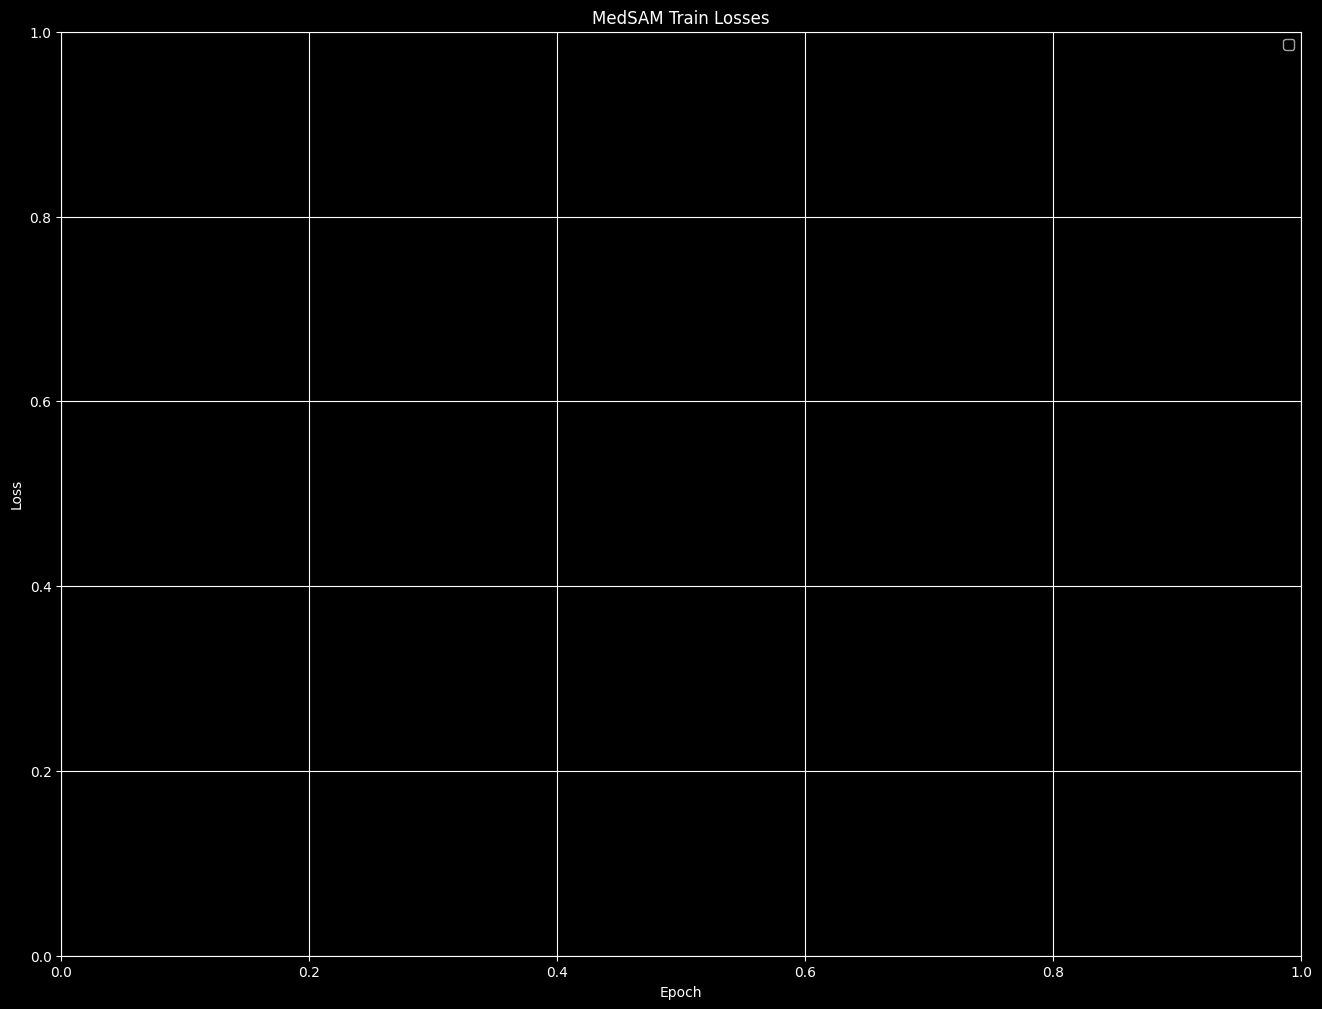

In [12]:
# MedSAM Train Losses
medsam_train_losses = {ts: values[0] for ts, values in medsam_data.items()}
plot_metric(medsam_train_losses, "MedSAM Train Losses", "Loss", out_png=f"./metrics_overview/medsam_train_losses{formatted_date}.png")

/tmp/ipykernel_7667/1749662990.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


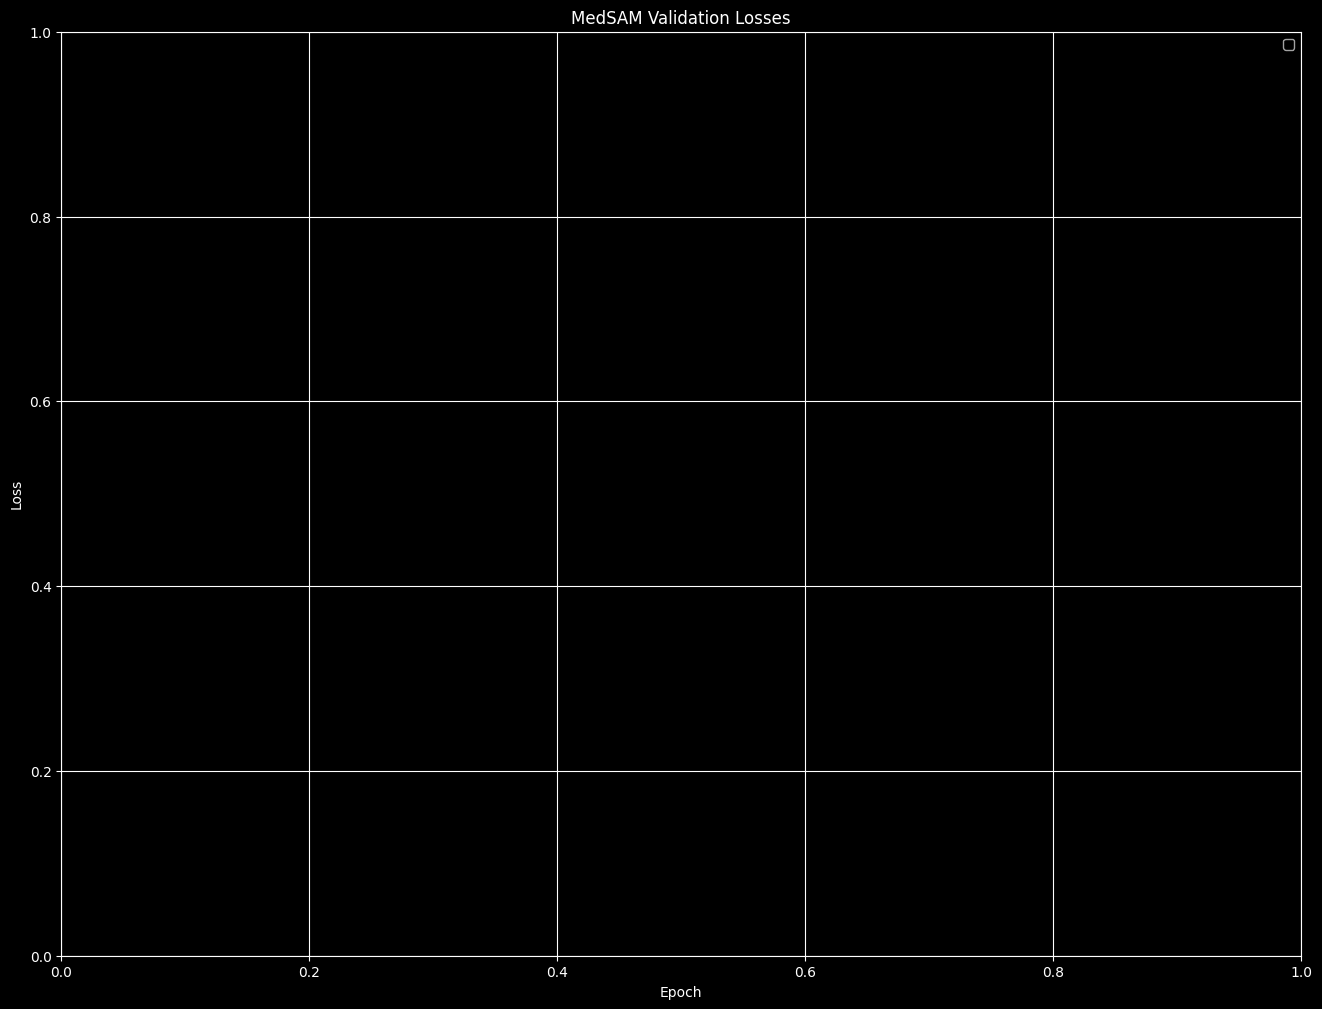

In [13]:
# MedSAM Validation Losses
medsam_val_losses = {ts: values[1] for ts, values in medsam_data.items()}
plot_metric(medsam_val_losses, "MedSAM Validation Losses", "Loss", out_png=f"./metrics_overview/medsam_val_losses{formatted_date}.png")

/tmp/ipykernel_7667/1749662990.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


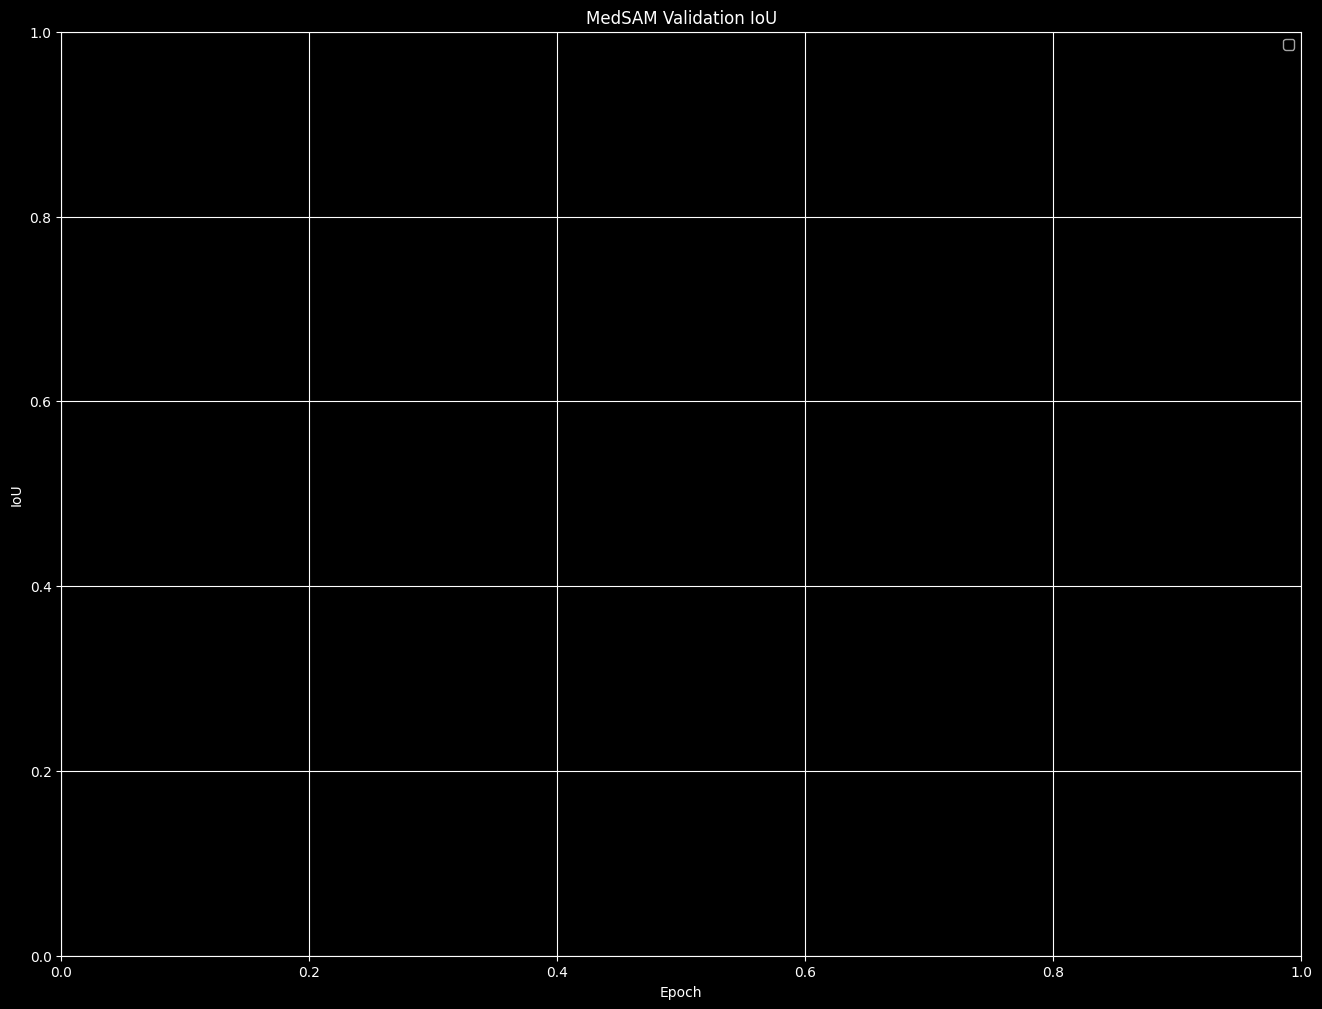

In [14]:
# MedSAM Validation IoU
medsam_val_iou = {ts: values[2] for ts, values in medsam_data.items()}
plot_metric(medsam_val_iou, "MedSAM Validation IoU", "IoU", out_png=f"./metrics_overview/medsam_val_iou{formatted_date}.png")

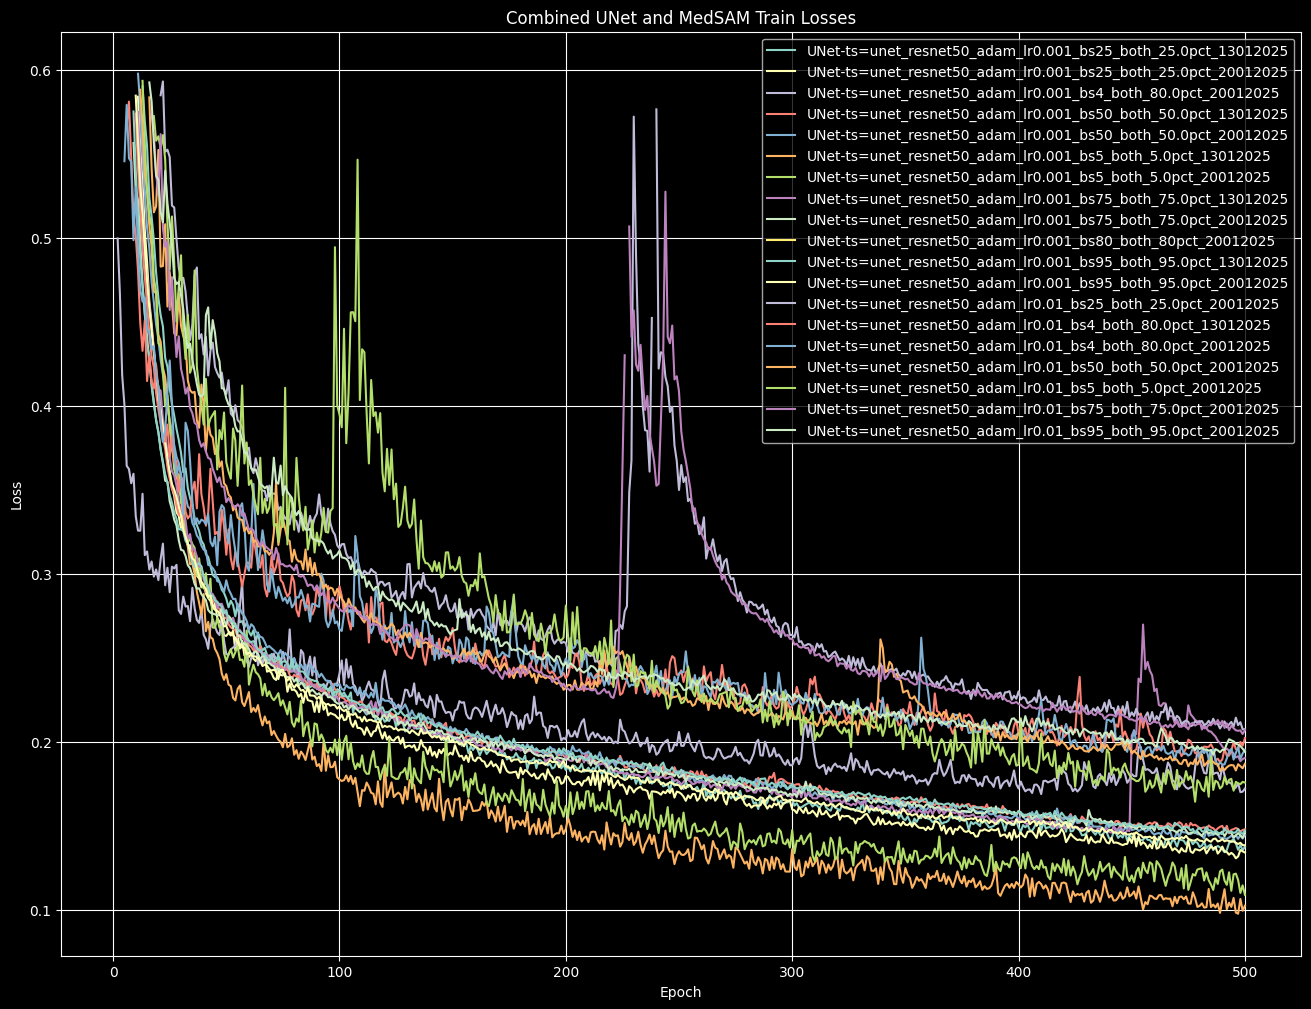

In [15]:
# Combined Train Losses (UNet and MedSAM)
combined_train_losses = {f"UNet-ts={ts}": values[0] for ts, values in unet_data.items()}
combined_train_losses.update({f"MedSAM-ts={ts}": values[0] for ts, values in medsam_data.items()})
plot_metric(combined_train_losses, "Combined UNet and MedSAM Train Losses", "Loss", out_png=f"./metrics_overview/combined_train_losses{formatted_date}.png")

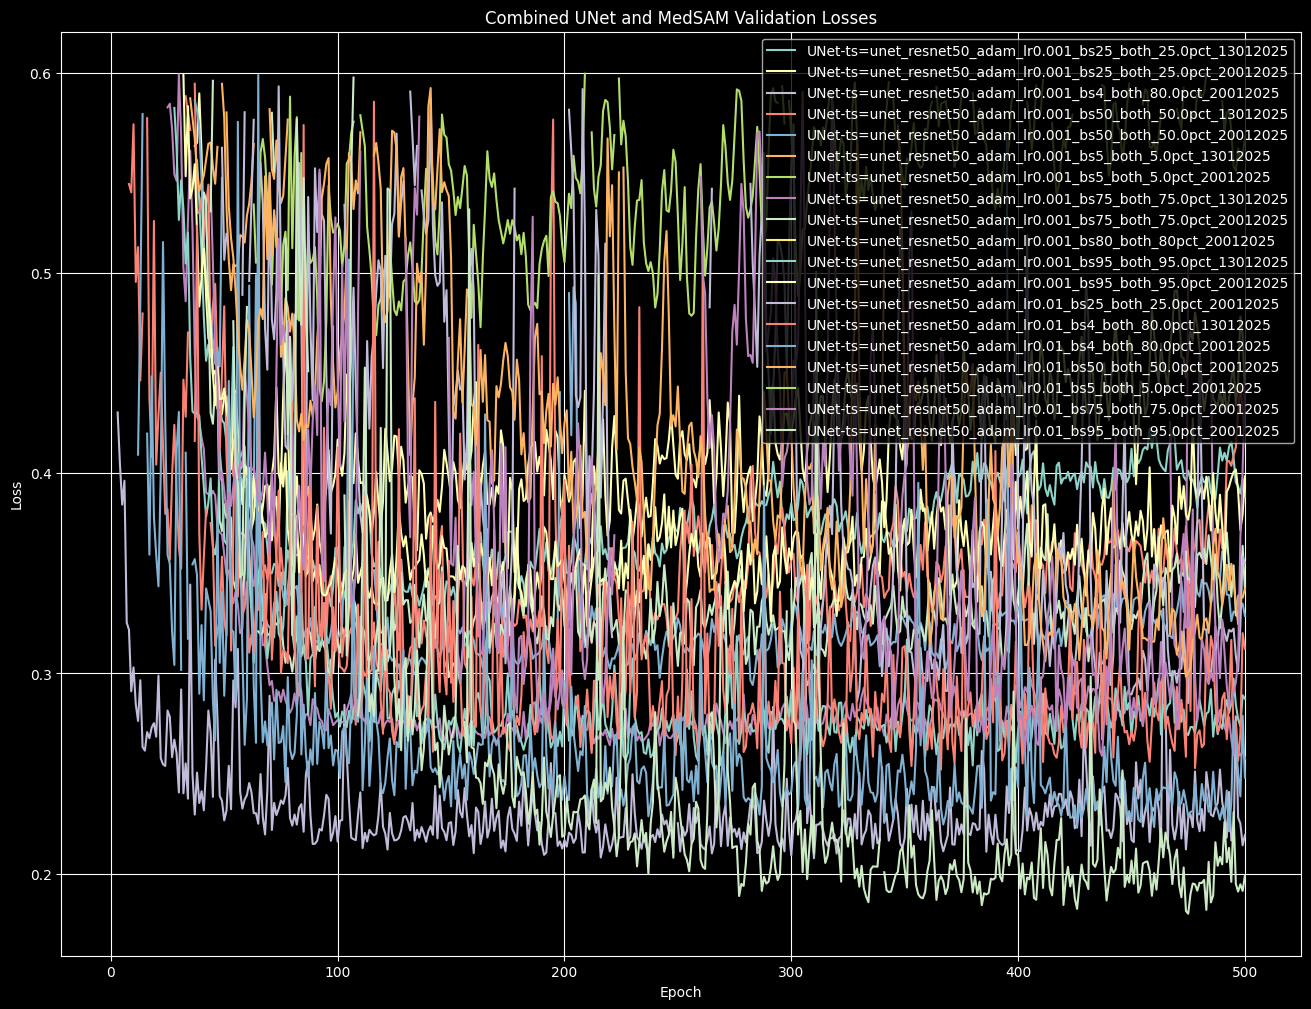

In [16]:
# Combined Validation Losses (UNet and MedSAM)
combined_val_losses = {f"UNet-ts={ts}": values[1] for ts, values in unet_data.items()}
combined_val_losses.update({f"MedSAM-ts={ts}": values[1] for ts, values in medsam_data.items()})
plot_metric(combined_val_losses, "Combined UNet and MedSAM Validation Losses", "Loss", out_png=f"./metrics_overview/combined_val_losses{formatted_date}.png")

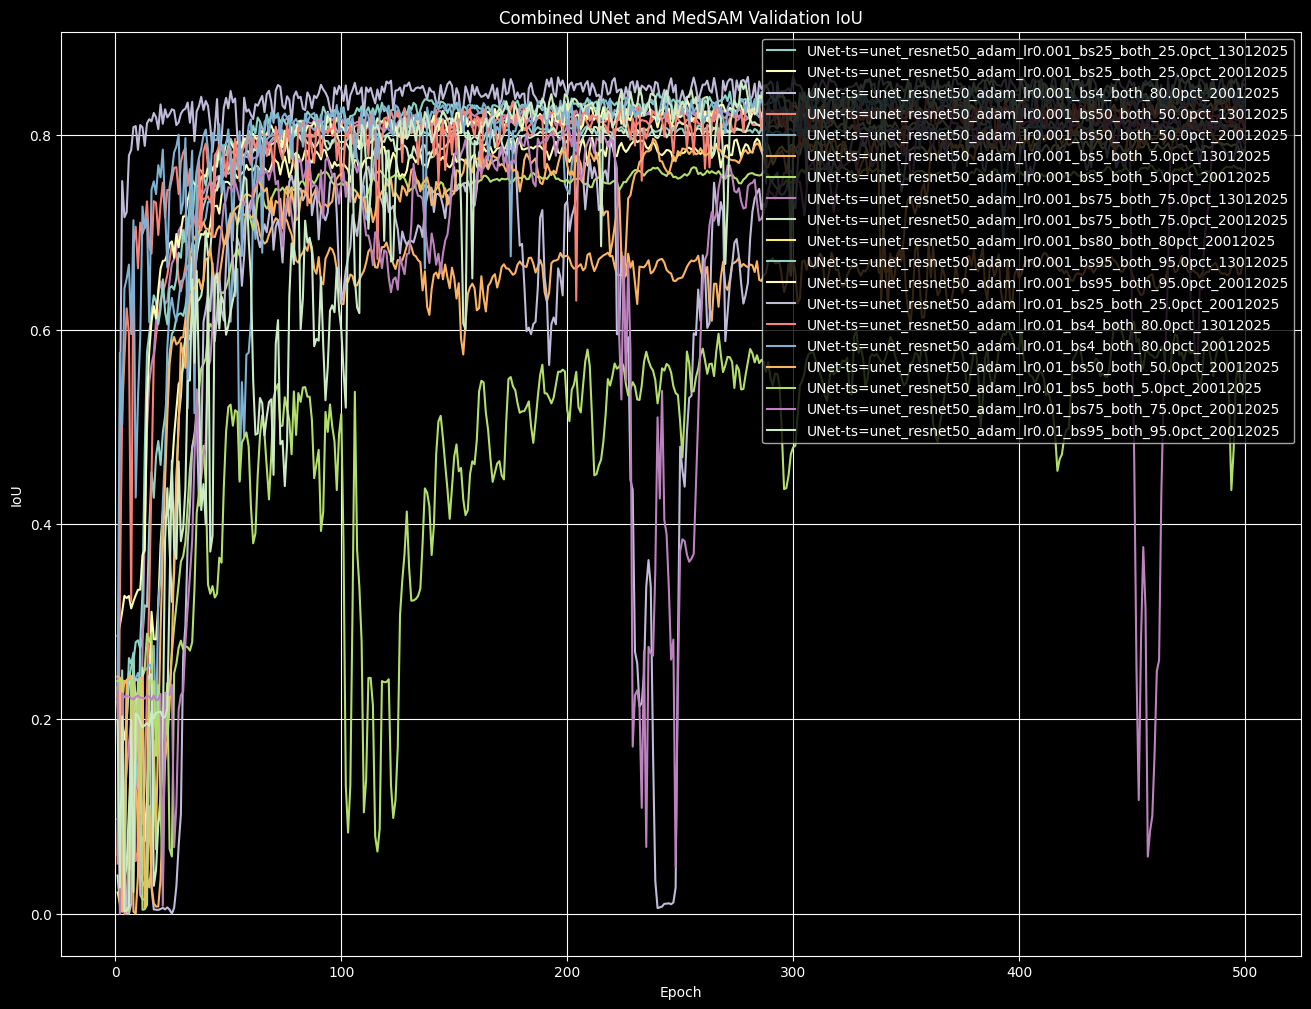

In [17]:
# Combined Validation IoU (UNet and MedSAM)
combined_val_iou = {f"UNet-ts={ts}": values[2] for ts, values in unet_data.items()}
combined_val_iou.update({f"MedSAM-ts={ts}": values[2] for ts, values in medsam_data.items()})
plot_metric(combined_val_iou, "Combined UNet and MedSAM Validation IoU", "IoU", out_png=f"./metrics_overview/combined_val_iou{formatted_date}.png")